In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['figure.figsize'] = (4, 4)

#### Example 1: Calculating Pi

The area of circle with radius 1 is pi. 

Consider a square centered at origin and having side length 2. If you fill the area with minute particles, and calculate fraction of number of particles lying within the circle given that the particles are fine (or number of particles are large enough), it should represent an estimate of area.

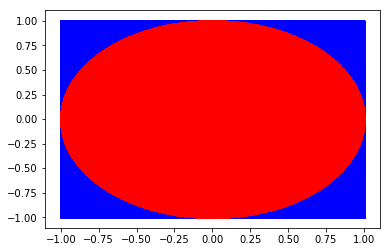

Value of PI: 3.139924


In [2]:
N=1000000

X=np.random.uniform(-1,1,N)
Y=np.random.uniform(-1,1,N)

idx=np.arange(N)[X**2+Y**2<1]

plt.scatter(X,Y,color='b',s=3)
plt.scatter(X[idx], Y[idx],color='r',s=2)

plt.show()

count = sum(X**2+Y**2<1) 
value = count / N * 4 

print('Value of PI:', value)

#### Example 2. Integrating a function

Compute fraction of points that lie under the curve

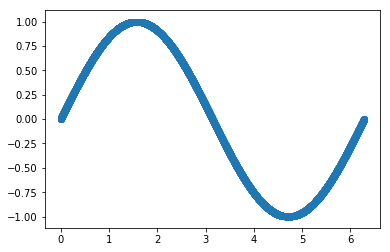

In [3]:
def f(x):
    return np.sin(x)

X = np.arange(0, 2*np.pi, 0.001)
Y = list(map(lambda x: f(x), X))

plt.scatter(X,Y)
plt.show()

Calculating area under $\sin \left(x\right)$ between 0 and pi

In [4]:
N = 1000000
X = np.random.uniform(0,np.pi,N)
Y = np.random.uniform(0,1,N)

value = sum(Y<f(X)) / N * np.pi
print('Integration of sin(x) between 0 and pi:', value)

Integration of sin(x) between 0 and pi: 2.001448989341639


#### Example 3: Application of Mean Value Theorem (MVT)

Use Mean Value Theorem for Integrals to integrate functions which states that the integration can be expressed as product of average of function values with width of interval. 

Mathematically:

\begin{equation}
f(x_{avg}) = \frac{1}{b-a} \int_{a}^{b} f(x) d x
\end{equation}

In [5]:
def f(x):
    return np.sin(x)

a = 0
b = np.pi
N = 1000000
X = np.random.uniform(a,b,N)
fX = list(map(lambda x: f(x), X))
np.mean(fX) * (b-a)

2.0000084963917635

This can be useful for functions which are hard to integrate analytically.

Let's try to integrate the function: $\sin \left(x^{2}\right)$, which doesn't have a simple formula for its antiderivative.

In [6]:
def f(x):
    return np.sin(x**2)

a = 0
b = np.pi
N = 1000000
X = np.random.uniform(a,b,N)
fX = list(map(lambda x: f(x), X))
np.mean(fX) * (b-a)

0.773386834922035

#### Example 4: Simulating MCQ test

We all are aware of the famous marking system (+3, -1) in Multiple Choice Questions with 4 options. If you take the expected value of marks students would get if they were to choose any option randomly, it will be:
\begin{equation}
3 * 1/4 + -1 * 3/4 = 0
\end{equation}

Let's try to check the same using Monte Carlo Simulations.

In [7]:
def generate_correct_answers(options, num_ques, seed):
    np.random.seed(seed)
    correct_answers = np.random.choice(options, num_ques, replace=True)
    return correct_answers

def get_marks(options, num_ques, correct_answers):
    marked_answers = np.random.choice(options, num_ques, p = [1 / len(options)] * len(options), replace=True)
    marks = sum(marked_answers==correct_answers) * 3 + sum(marked_answers!=correct_answers) * -1
    return marks

def simulate(num_students, num_ques, options, seed):
    correct_answers = generate_correct_answers(options, num_ques, seed)
    marks = []
    for _ in tqdm(range(num_students)):
        marks.append(get_marks(options, num_ques, correct_answers))
    return marks

100%|██████████| 10000/10000 [07:23<00:00, 22.55it/s]


Expected Value of student marks: 0.112


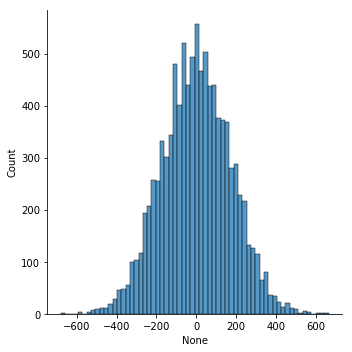

In [8]:
num_ques = 10000
num_choices = 4
positive_marks = 3
negative_marks = -1
num_students = 10000
options = list(range(num_choices))
seed = 42

marks = simulate(num_students, num_ques, options, seed)
print('Expected Value of student marks:', np.mean(marks).round(3))
sns.displot(marks)
plt.show()